In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

In [2]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [4]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Classification%20of%20the%20state%20universities%20in%20Turkey/datam.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'datam.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 109 rows and 15 columns


In [6]:
df1.head(5)

,sıra,adi,sehir,presence_rank,impact_rank,openness_rank,excellence_rank,twitter,facebook,makale_puani1,toplam_atif_puani2,toplam_bilimsel_dokuman_puani3,doktora_mezun_ogrenci_sayisi_puani4,ogretim_uyesi_ogrencipuani5,toplam_puan
0,1,HACETTEPE ÜNİVERSİTESİ,ANKARA,1017.0,1341.0,798.0,685.0,21800,79573.0,195.90,197.14,179.21,175.63,57.49,805.37
1,2,ORTA DOĞU TEKNİK ÜNİVERSİTESİ,ANKARA,753.0,434.0,925.0,580.0,137156,128828.0,183.60,184.24,178.43,174.22,46.02,766.52
2,3,İSTANBUL ÜNİVERSİTESİ,İSTANBUL,928.0,1065.0,982.0,716.0,55600,118626.0,166.45,161.34,164.14,183.99,52.40,728.33
3,4,İSTANBUL TEKNİK ÜNİVERSİTESİ,İSTANBUL,666.0,938.0,358.0,594.0,42000,79444.0,174.50,173.47,163.95,157.16,45.02,714.10
4,5,ANKARA ÜNİVERSİTESİ,ANKARA,560.0,1228.0,742.0,766.0,259150,70124.0,152.26,151.92,152.54,188.59,54.59,699.89


In [7]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

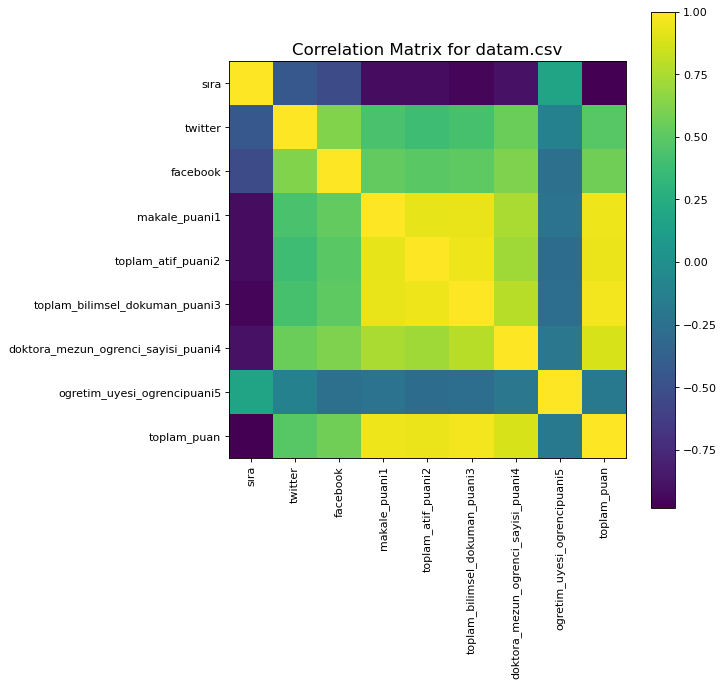

In [8]:
plotCorrelationMatrix(df1, 8)

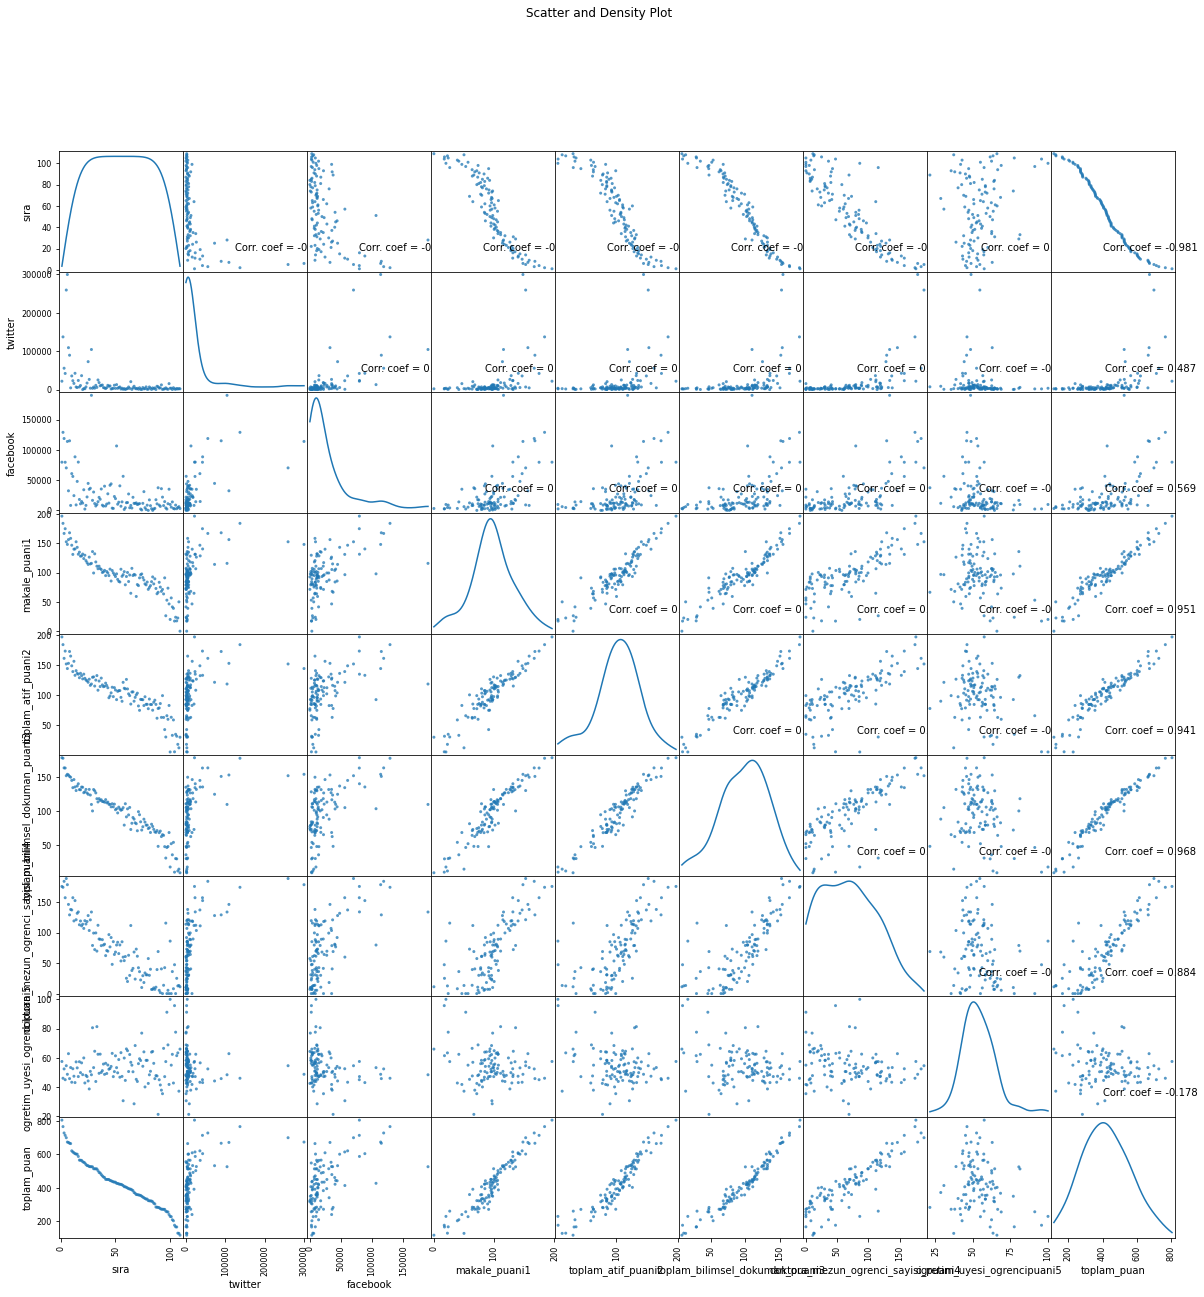

In [9]:
plotScatterMatrix(df1, 20, 10)